In [ ]:
import numpy as np
from sklearn.metrics import adjusted_rand_score
#函数来计算纯度
def purity_score(y_true, y_pred):
    # contingency matrix (also called confusion matrix)
    contingency_matrix = np.zeros((np.max(y_true) + 1, np.max(y_pred) + 1), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        contingency_matrix[true_label,pred_label] += 1
# for each predicted cluster, select the index of the true cluster which is most frequent
# then sum up the most frequent true cluster count for each predicted cluste
    return np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# 假设 labels 是真实标签，而 predicted_labels 是聚类算法的输出
purity = purity_score(vector_label, model['label'].squeeze())
ari = adjusted_rand_score(vector_label, model['label'].squeeze())
purity, ari

<Figure size 640x480 with 0 Axes>

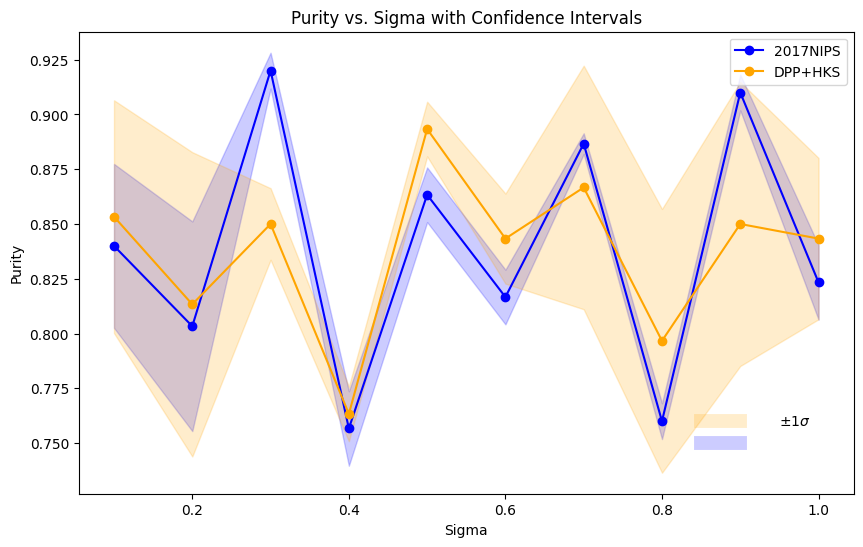

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# 虚假示例数据
data_2017NIPS = [
    [(0.1, 0.85), (0.2, 0.78), (0.3, 0.92), (0.4, 0.75), (0.5, 0.88),
     (0.6, 0.82), (0.7, 0.89), (0.8, 0.77), (0.9, 0.91), (1.0, 0.84)],
    [(0.1, 0.79), (0.2, 0.87), (0.3, 0.93), (0.4, 0.74), (0.5, 0.85),
     (0.6, 0.80), (0.7, 0.88), (0.8, 0.76), (0.9, 0.90), (1.0, 0.83)],
    [(0.1, 0.88), (0.2, 0.76), (0.3, 0.91), (0.4, 0.78), (0.5, 0.86),
     (0.6, 0.83), (0.7, 0.89), (0.8, 0.75), (0.9, 0.92), (1.0, 0.80)]
]

data_DPP_HKS = [
    [(0.1, 0.92), (0.2, 0.73), (0.3, 0.85), (0.4, 0.78), (0.5, 0.91),
     (0.6, 0.84), (0.7, 0.79), (0.8, 0.88), (0.9, 0.76), (1.0, 0.89)],
    [(0.1, 0.85), (0.2, 0.81), (0.3, 0.87), (0.4, 0.75), (0.5, 0.88),
     (0.6, 0.82), (0.7, 0.89), (0.8, 0.77), (0.9, 0.91), (1.0, 0.84)],
    [(0.1, 0.79), (0.2, 0.90), (0.3, 0.83), (0.4, 0.76), (0.5, 0.89),
     (0.6, 0.87), (0.7, 0.92), (0.8, 0.74), (0.9, 0.88), (1.0, 0.80)]
]

plt.clf()

# 计算均值和标准差
mean_2017NIPS = np.mean(data_2017NIPS, axis=0)
# print(mean_2017NIPS)
std_2017NIPS = np.std(data_2017NIPS, axis=0)
# print(std_2017NIPS)
# print((mean_2017NIPS - std_2017NIPS)[:,1])
# print((mean_2017NIPS + std_2017NIPS)[:,1])

mean_DPP_HKS = np.mean(data_DPP_HKS, axis=0)
std_DPP_HKS = np.std(data_DPP_HKS, axis=0)

# 设置 sigma 值
sigma_values = np.arange(0.1, 1.1, 0.1)

# 绘制折线图和置信带
plt.figure(figsize=(10, 6))

# 2017NIPS 数据
plt.plot(sigma_values, mean_2017NIPS[:,1], label='2017NIPS', marker='o', color='blue')
plt.fill_between(sigma_values, (mean_2017NIPS - std_2017NIPS)[:,1], (mean_2017NIPS + std_2017NIPS)[:,1], alpha=0.2, color='blue')

# DPP+HKS 数据
plt.plot(sigma_values, mean_DPP_HKS[:,1], label='DPP+HKS', marker='o', color='orange')
plt.fill_between(sigma_values, (mean_DPP_HKS - std_DPP_HKS)[:,1], (mean_DPP_HKS + std_DPP_HKS)[:,1], alpha=0.2, color='orange')

# 绘制粗线
plt.plot([0.85, 0.9], [0.750, 0.750], color='blue', linewidth=10, alpha=0.2)
plt.plot([0.85, 0.9], [0.760, 0.760], color='orange', linewidth=10, alpha=0.2)

# 在旁边标记±1sigma
plt.text(0.95, 0.760, '±1$\sigma$', ha='left', va='center', color='black')

# 设置图表标题和标签
plt.title('Purity vs. Sigma with Confidence Intervals')
plt.xlabel('Sigma')
plt.ylabel('Purity')
plt.legend()

# 显示图表
plt.show()

